In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [43]:
# load the data
sal_data = pd.read_csv(r'C:\Users\roosb\Documents\CV\ML_Projects\SalaryPrediction\Data\Salary_dataset.csv')

# drop unnecessary index column
df = sal_data.drop('Unnamed: 0', axis =1, errors = 'ignore')

# define feature and target
X = df[['YearsExperience']]
y = df[['Salary']]

In [6]:
## split the data, initialize the model & fit it to the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [48]:
## predict the Salary
pred = lm.predict(X_test)

## compare the predicted price to actual one.
df_pred = pd.DataFrame(pred, columns = ['Predicted Price'])
df_ytest = y_test.reset_index(drop = True)

# combine them into one DataFrame
df_combined = pd.concat([df_pred, df_ytest], axis=1)
df_combined.columns=['Predicted Price','Actual Price']
print(df_combined)

   Predicted Price  Actual Price
0     91101.582558       91739.0
1    109298.208882      109432.0
2     56623.764259       54446.0
3     82482.127983       81364.0
4     40342.572284       37732.0
5    117917.663457      112636.0
6    116959.946282      116970.0
7     74820.390583       66030.0
8    112171.360407      105583.0


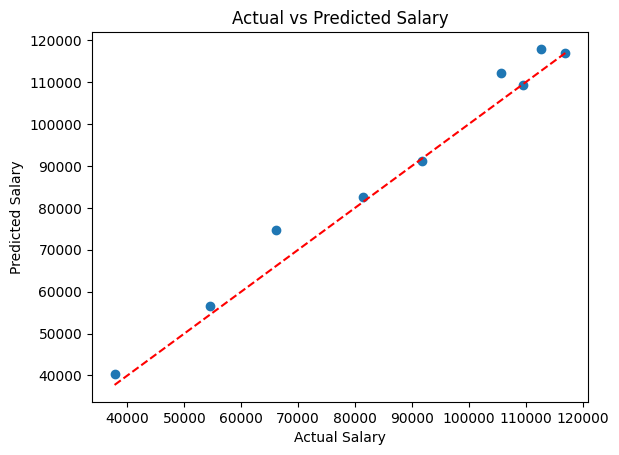

3038.6823612518833


In [49]:
plt.scatter(y_test, pred)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
# Plot the ideal line y=x for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

## calculate the mean absolute error in order to evalute the model
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, pred))